In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('corruption_dataset.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 33 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   country                                                                 23 non-null     object 
 1   Important to be loyal to friends and devote to people close             23 non-null     float64
 2   Important to care for nature and environment                            23 non-null     float64
 3   Important to follow traditions and customs                              23 non-null     float64
 4   Important to seek fun and things that give pleasure                     23 non-null     float64
 5   Most people can be trusted or you can't be too careful                  23 non-null     float64
 6   Most people try to take advantage of you, or try to be fair             23 non-null 

In [6]:
df1 = df[['country', 'Important to be loyal to friends and devote to people close', 'How happy are you']]
df1.head()

,country,Important to be loyal to friends and devote to people close,How happy are you
0,AT,1.760611,7.440892
1,BE,1.766017,7.666110
2,BG,1.878880,5.233060
3,CH,1.687326,8.071111
4,CY,1.809091,7.693548


In [8]:
df2 = pd.read_excel('corruption_dataset.xlsx', sheet_name=1)

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622 entries, 0 to 621
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Nation      621 non-null    object 
 1   S-Share     621 non-null    float64
 2   Discipline  621 non-null    object 
dtypes: float64(1), object(2)
memory usage: 14.7+ KB


In [11]:
df3 = pd.read_excel('corruption_dataset.xlsx', sheet_name=2)

In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       23 non-null     object 
 1   Corruption Perception Index   23 non-null     float64
 2   GDP per capita (current US$)  23 non-null     float64
dtypes: float64(2), object(1)
memory usage: 680.0+ bytes


In [13]:
df3

,country,Corruption Perception Index,GDP per capita (current US$)
0,Austria,8.6,39299.622512
1,Belgium,7.3,37918.781131
2,Bulgary,4.0,4313.430636
3,Switzerland,9.1,54140.354214
4,Cyprus,5.6,23863.555464
5,Denmark,8.0,35237.610626
6,Germany,9.5,50462.247718
7,Estonia,6.7,12472.805266
8,Spain,6.8,27847.456781
9,Finland,9.6,39487.062314


Supongamos que queremos unificar la tabla "df1" con "df3" para correr una regresión múltiple en donde la variable dependiente sea corrupción, y el resto sean las variables independientes. Según lo que aprendimos en el taller 8B, podríamos usar la función concat de la librería pandas, así:

In [16]:
df4 = pd.concat([df1,df3])

In [17]:
df4.head()

,country,Important to be loyal to friends and devote to people close,How happy are you,Corruption Perception Index,GDP per capita (current US$)
0,AT,1.760611,7.440892,NaN,NaN
1,BE,1.766017,7.666110,NaN,NaN
2,BG,1.878880,5.233060,NaN,NaN
3,CH,1.687326,8.071111,NaN,NaN
4,CY,1.809091,7.693548,NaN,NaN


Esta solución no es buena porque aunque la variable "country" es la misma para la tabla df1 y df3, los registros son diferentes. Observe que en df1 los registros de country son AT, BE, etc; mientras que en df3 los registros de country son Austria, Belgium, etc. Una solución podría ser crear una nueva variable común entre ambas variables, usando el índice de las filas, pues en este caso los países coinciden.

In [24]:
import numpy as np
df1['country_id'] = np.arange(len(df1))
df3['country_id'] = np.arange(len(df3))

<ipython-input-24-6b2a1cd22ffe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['country_id'] = np.arange(len(df1))


In [25]:
df4 = pd.merge(df1,df3, left_on='country_id', right_on='country_id', how='outer')
df4.head()

,country_x,Important to be loyal to friends and devote to people close,How happy are you,country_id,country_y,Corruption Perception Index,GDP per capita (current US$)
0,AT,1.760611,7.440892,0,Austria,8.6,39299.622512
1,BE,1.766017,7.666110,1,Belgium,7.3,37918.781131
2,BG,1.878880,5.233060,2,Bulgary,4.0,4313.430636
3,CH,1.687326,8.071111,3,Switzerland,9.1,54140.354214
4,CY,1.809091,7.693548,4,Cyprus,5.6,23863.555464


Pongamos nombres cortos a las variables tal como aprendimos en el taller 8B

In [27]:
datos = df4.rename(columns={'Important to be loyal to friends and devote to people close':'L2F', 'How happy are you':'Happy', 'GDP per capita (current US$)':'GDPpc'})
datos.head()

,country_x,L2F,Happy,country_id,country_y,Corruption Perception Index,GDPpc
0,AT,1.760611,7.440892,0,Austria,8.6,39299.622512
1,BE,1.766017,7.666110,1,Belgium,7.3,37918.781131
2,BG,1.878880,5.233060,2,Bulgary,4.0,4313.430636
3,CH,1.687326,8.071111,3,Switzerland,9.1,54140.354214
4,CY,1.809091,7.693548,4,Cyprus,5.6,23863.555464


Ahora sí, con la tabla "datos" podemos proceder al análisis de regresión múltiple.

In [28]:
Independientes = datos[['L2F', 'GDPpc', 'Happy']]
Dependiente = datos['Corruption Perception Index']

In [29]:
import statsmodels.api as sm

In [33]:
model = sm.OLS(Dependiente, Independientes).fit()

In [34]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                     
================================================================================================
Dep. Variable:     Corruption Perception Index   R-squared (uncentered):                   0.982
Model:                                     OLS   Adj. R-squared (uncentered):              0.979
Method:                          Least Squares   F-statistic:                              365.4
Date:                         Thu, 07 Oct 2021   Prob (F-statistic):                    1.25e-17
Time:                                 19:06:05   Log-Likelihood:                         -31.644
No. Observations:                           23   AIC:                                      69.29
Df Residuals:                               20   BIC:                                      72.69
Df Model:                                    3                                                  
Covariance Type:                     nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
L2F           -0.8674      0.807     -1.074      0.295      -2.552       0.817
GDPpc       6.187e-05   1.85e-05      3.348      0.003    2.33e-05       0.000
Happy          0.9331      0.280      3.333      0.003       0.349       1.517
==============================================================================
Omnibus:                        3.245   Durbin-Watson:                   2.745
Prob(Omnibus):                  0.197   Jarque-Bera (JB):                1.545
Skew:                          -0.281   Prob(JB):                        0.462
Kurtosis:                       1.861   Cond. No.                     1.40e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Reglas generales de interpretación

## Regla 1. 
Todo modelo de regresión múltiple genera **varios resultados** y debemos interpretarlos uno a uno. 

## Regla 2. 
El resultado más general de un modelo de regresión es su R-squared (R-cuadrado en español) o R² en lenguaje matemático. El valor de R² oscila entre cero (0) y uno (1). Si R² $\approx$  0, quiere decir que nuestras varaibles independientes no son buenas predictoras de la variable dependiente. Si R² es $\approx $ 1, eso indica que nuestras variables independientes son muy buenas predictoras de la variable dependiente. 

## Regla 3.
El valor concreto de R² puede interpretarse cómo el porcentaje de datos que se ajustan sin error "a la perfección" al modelo de regresión que hemos especificado. En este caso, un valor de R² = 0.982 revela que el 98.2% de los datos se ajustan al modelo que usa como predictoras las variables "happy", "L2F" y "GDPpc". Observe que en estos resultados también se incluye un Adj R² = 0.979 (este es un ajuste que se hace al R² inicial) y es el que debería usarse para interpretación general. En este caso, no hay mucha diferencia entre ambos R² pero en otros casos pueden observarse diferencias importantes.

## Regla 4. 
La asociación que cada variable independiente tiene con la variable dependiente también tiene un valor numérico específico y este valor se identifica como **coef** dentro de los resultados observados. El valor de cada **coef** oscila también entre -$\infty$ y $\infty$. Este **coef** indica en cuanto cambia la variable dependiente si la variable independiente cambia en una unidad, manteniendo constantes otras variables independientes. Por ejemplo, la lealtad a los amigos y familia (L2F) tiene un **coef** = -0.8674. Eso significa que la percepción de corrupción aumenta una unidad cada vez que disminuyen 0.8674 unidades de L2F. El valor del **coef** para GDPpc es de 6.187e-05. Esto significa que la percepción de corrupción aumenta en una unidad por un factor de 0.00006187. 
Este **coef** se llama coeficiente no estandarizado y se expresa en la unidad de medida de la variable independiente. Una forma más práctica de interpretar los resultados es a través de los **coeficientes estandarizados** que oscilan entre 0 y 1. Para obtener los coeficientes estandarizados, debemos estandarizar los datos de la tabla de datos antes de correr la regresión, de la siguiente manera:


In [41]:
from scipy import stats
df_z = datos.select_dtypes(include=[np.number]).dropna().apply(stats.zscore)
df_z.head()

,L2F,Happy,country_id,Corruption Perception Index,GDPpc
0,-1.052866,0.354334,-1.658312,0.833291,0.501952
1,-1.024901,0.631646,-1.507557,0.219611,0.426503
2,-0.441013,-2.364173,-1.356801,-1.338191,-1.409696
3,-1.432003,1.130325,-1.206045,1.069322,1.312850
4,-0.802060,0.665431,-1.055290,-0.582893,-0.341476


In [45]:
Independientes = df_z[['L2F', 'GDPpc', 'Happy']]
Dependiente = df_z['Corruption Perception Index']

In [46]:
model2 = sm.OLS(Dependiente, Independientes).fit()

In [47]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                     
================================================================================================
Dep. Variable:     Corruption Perception Index   R-squared (uncentered):                   0.796
Model:                                     OLS   Adj. R-squared (uncentered):              0.765
Method:                          Least Squares   F-statistic:                              25.96
Date:                         Thu, 07 Oct 2021   Prob (F-statistic):                    4.23e-07
Time:                                 19:59:51   Log-Likelihood:                         -14.373
No. Observations:                           23   AIC:                                      34.75
Df Residuals:                               20   BIC:                                      38.15
Df Model:                                    3                                                  
Covariance Type:                     nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
L2F           -0.0883      0.114     -0.775      0.447      -0.326       0.149
GDPpc          0.5446      0.186      2.927      0.008       0.157       0.933
Happy          0.3407      0.194      1.753      0.095      -0.065       0.746
==============================================================================
Omnibus:                        3.118   Durbin-Watson:                   2.748
Prob(Omnibus):                  0.210   Jarque-Bera (JB):                1.492
Skew:                          -0.263   Prob(JB):                        0.474
Kurtosis:                       1.868   Cond. No.                         3.72
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Regla 5:
Con los coeficientes estandarizados, podemos identificar cuál de las tres variables independientes en este caso es la primera más importante predictora de corrupción, cuál es la segunda más importante, y la menos importante, simplemente viendo cual de ellas tiene el coef con valor absoluto más grande. En este caso, GDPpc es la variable más importante para predecir percepción de corrupción pues su **coef** = 0.5446. La segunda variable más importante es Happy (**coef** = 0.3407) y la menos importante es L2F (**coef** = -0.0883). En este ejemplo, esta regla 5 coincide con la evaluación visual que se puede hacer al mirar las correlaciones bivariadas con el siguiente gráfico elaborado con matplotlib y seaborn.

In [38]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

def corrfunc(x, y, ax = None, **kws):
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'r = {r:.2f}', xy=(0.1, 0.9), xycoords=ax.transAxes)

In [36]:
datos2 = datos[['L2F', 'GDPpc', 'Happy', 'Corruption Perception Index']]

/home/jc/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


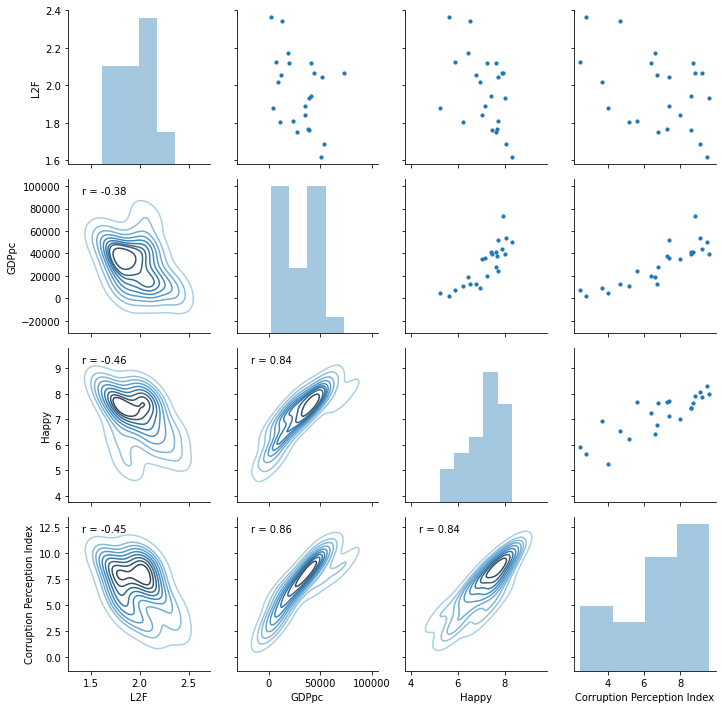

In [39]:
import seaborn as sns
g = sns.PairGrid(datos2, palette=['red'])
g.map_upper(plt.scatter, s=10)
g.map_diag(sns.distplot, kde=False)
g.map_lower(corrfunc)
g.map_lower(sns.kdeplot, cmap="Blues_d")